In [2]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
countries = ['China', 'Korea', 'Japan', 'USA', 'Germany']
industries = ['steel', 'semi', 'car']

tau_factual = {
    'China': {
        'Korea': {'steel': 1, 'semi': 1, 'car': 1.059},
        'Japan': {'steel': 1, 'semi': 1, 'car': 1},
        'USA': {'steel': 1, 'semi': 1.25, 'car': 1.2275},
        'Germany': {'steel': 1.359, 'semi': 1, 'car': 1.03}
    },
    'Korea':{
        'China': {'steel': 1.005, 'semi': 1.01, 'car': 1.04},
        'Japan': {'steel': 1, 'semi': 1, 'car': 1},
        'USA': {'steel': 1, 'semi': 1, 'car': 1},
        'Germany': {'steel': 1, 'semi': 1, 'car': 1}
    },
    'Japan': {
        'China': {'steel': 1.044, 'semi': 1, 'car': 1.077},
        'Korea': {'steel': 1, 'semi': 1, 'car': 1.065},
        'USA': {'steel': 1, 'semi': 1, 'car': 1.0212},
        'Germany': {'steel': 1, 'semi': 1, 'car': 1}
    },
    'USA': {
        'China': {'steel': 1.05, 'semi': 1, 'car': 1.085},
        'Korea': {'steel': 1, 'semi': 1, 'car': 1},
        'Japan': {'steel': 1, 'semi': 1, 'car': 1},
        'Germany': {'steel': 1, 'semi': 1, 'car': 1.03}
    },
    'Germany': {
        'China': {'steel': 1.05, 'semi': 1, 'car': 1.085},
        'Korea': {'steel': 1, 'semi': 1, 'car': 1},
        'Japan': {'steel': 1, 'semi': 1, 'car': 1},
        'USA': {'steel': 1, 'semi': 1, 'car': 1.0212}
    }

}

factual_tariffs = {country: pd.DataFrame(data) for country, data in tau_factual.items()}

factual_tariffs

{'China':        Korea  Japan     USA  Germany
 steel  1.000      1  1.0000    1.359
 semi   1.000      1  1.2500    1.000
 car    1.059      1  1.2275    1.030,
 'Korea':        China  Japan  USA  Germany
 steel  1.005      1    1        1
 semi   1.010      1    1        1
 car    1.040      1    1        1,
 'Japan':        China  Korea     USA  Germany
 steel  1.044  1.000  1.0000        1
 semi   1.000  1.000  1.0000        1
 car    1.077  1.065  1.0212        1,
 'USA':        China  Korea  Japan  Germany
 steel  1.050      1      1     1.00
 semi   1.000      1      1     1.00
 car    1.085      1      1     1.03,
 'Germany':        China  Korea  Japan     USA
 steel  1.050      1      1  1.0000
 semi   1.000      1      1  1.0000
 car    1.085      1      1  1.0212}

In [4]:
#데이터 불러오기
directory = '/Users/minjiku/Desktop/2024GE학술제'

optimal_tariffs = {}
for country in ['China', 'Korea', 'Japan', 'USA', 'Germany']:
    file_path = os.path.join(directory, f'{country}_optimal_tariffs.csv')
    df = pd.read_csv(file_path, index_col=0)
    optimal_tariffs[country] = df

optimal_tariffs

{'China':           Korea     Japan       USA   Germany
 steel  1.008307  1.187338  1.103447  1.492942
 semi   1.197747  1.344613  1.130102  1.234103
 car    1.227930  1.467971  1.375232  1.147717,
 'Korea':           China     Japan       USA   Germany
 steel  1.017487  1.105620  1.269560  1.477959
 semi   1.243078  1.035634  1.180085  1.079833
 car    1.318355  1.428929  1.424166  1.009990,
 'Japan':           China     Korea       USA   Germany
 steel  1.192585  1.185510  1.437613  1.067256
 semi   1.380531  1.047165  1.449949  1.015122
 car    1.104283  1.254028  1.228797  1.237522,
 'USA':           China     Korea     Japan   Germany
 steel  1.128185  1.082374  1.230149  1.473424
 semi   1.275609  1.481820  1.147247  1.158698
 car    1.284542  1.420433  1.116548  1.324435,
 'Germany':           China     Korea     Japan       USA
 steel  1.092026  1.071826  1.381118  1.347839
 semi   1.475152  1.321958  1.248226  1.066554
 car    1.136385  1.386117  1.039144  1.057352}

시각화

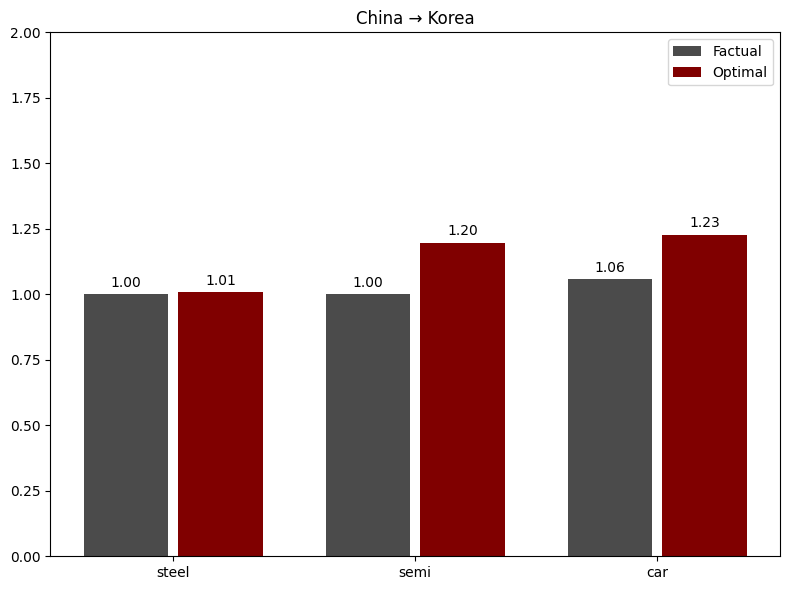

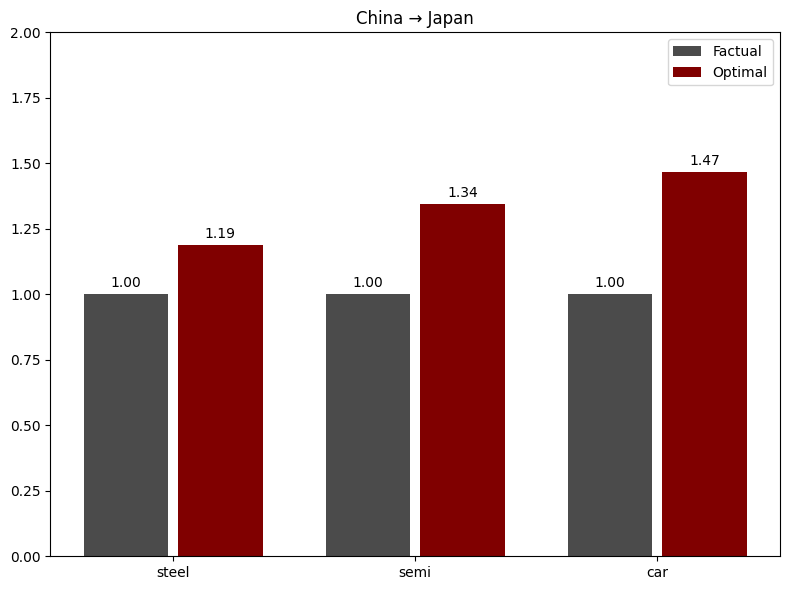

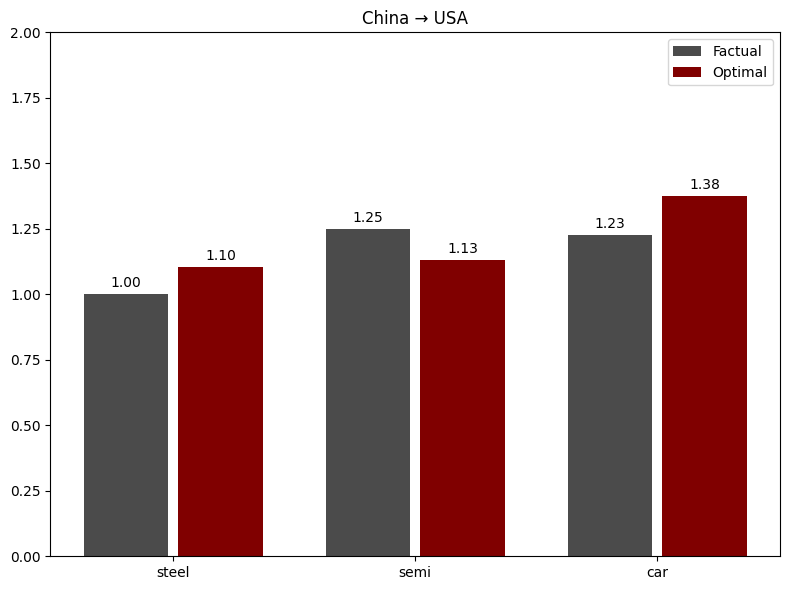

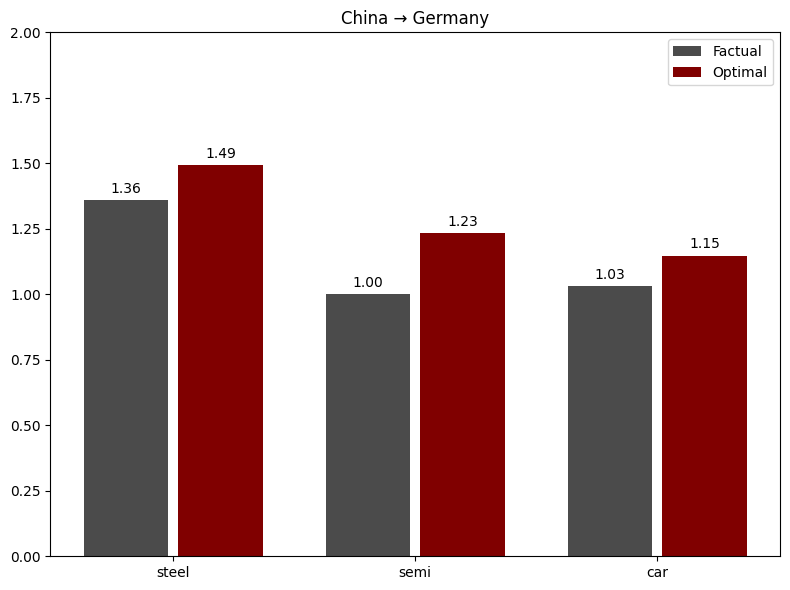

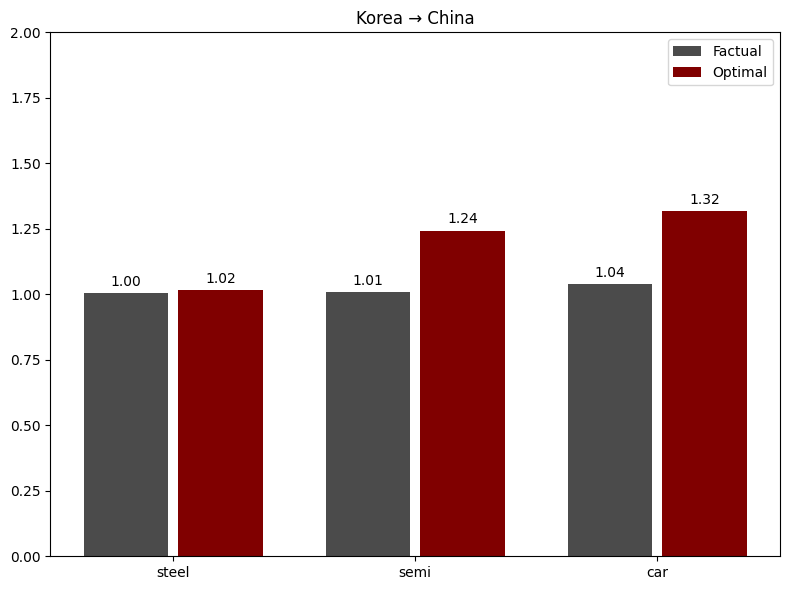

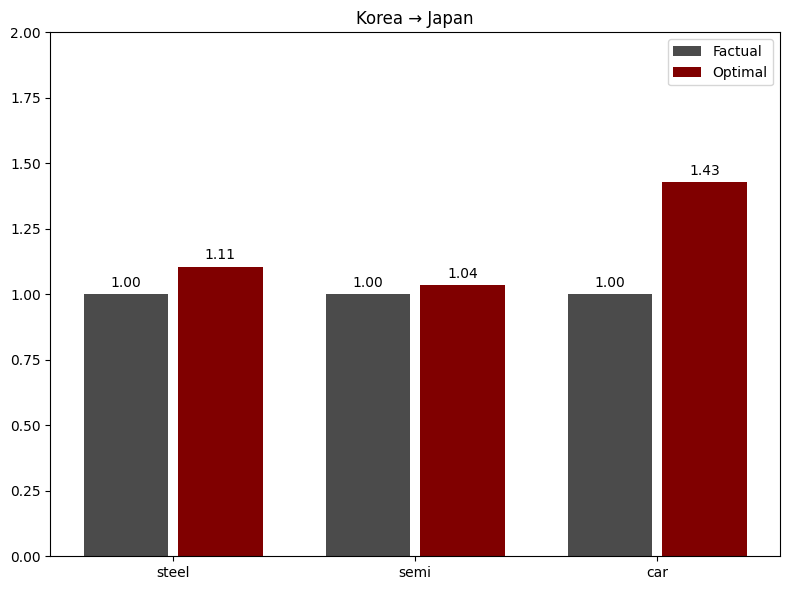

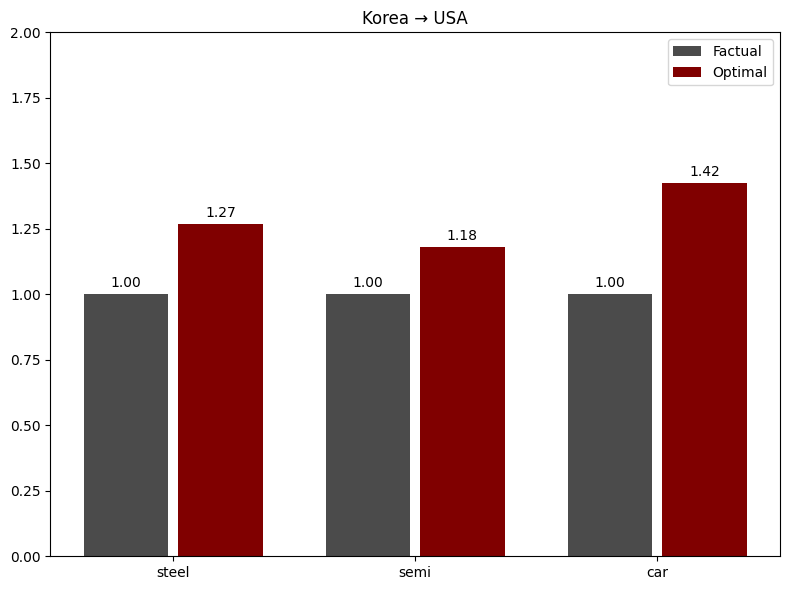

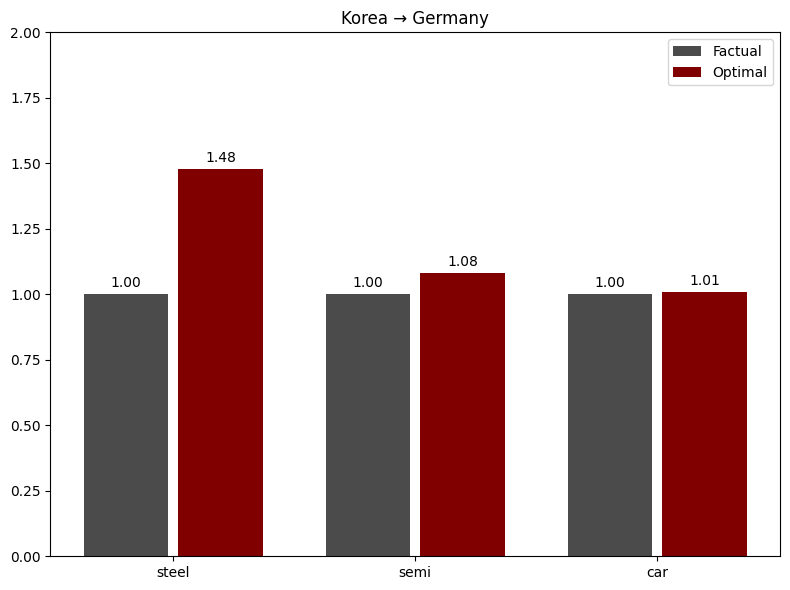

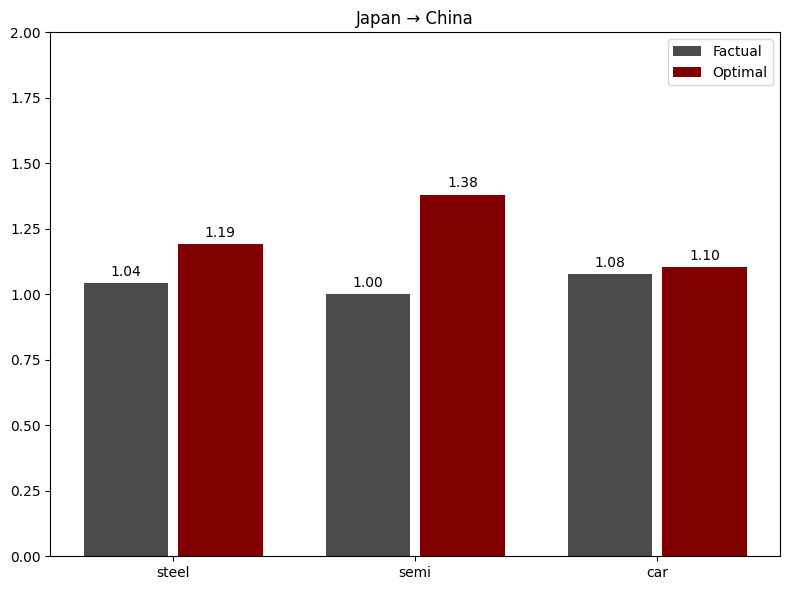

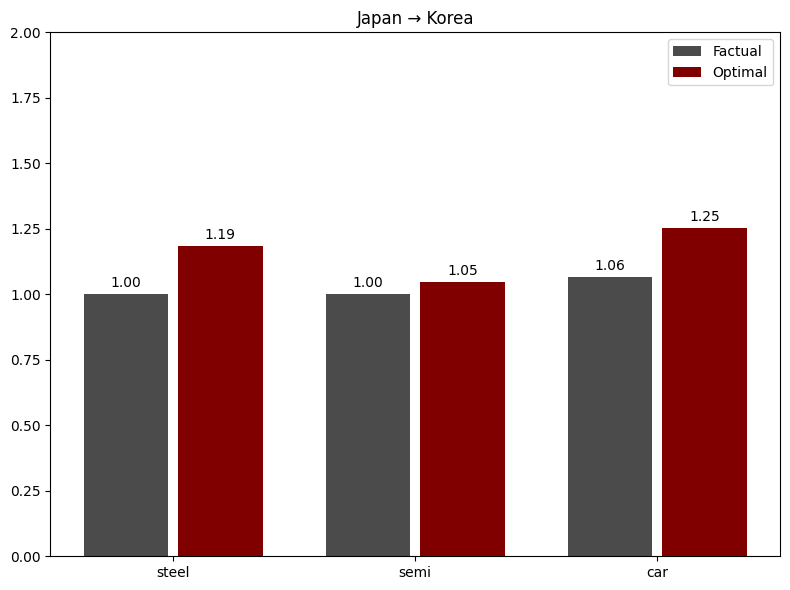

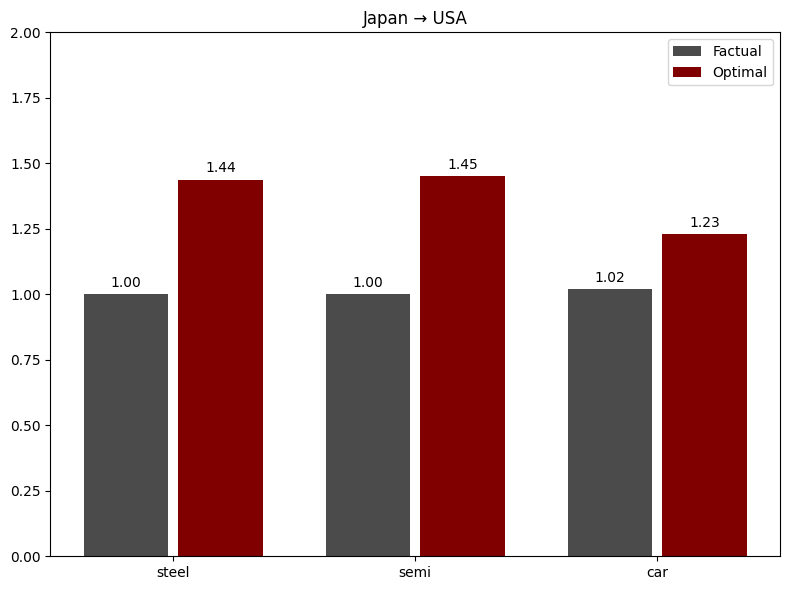

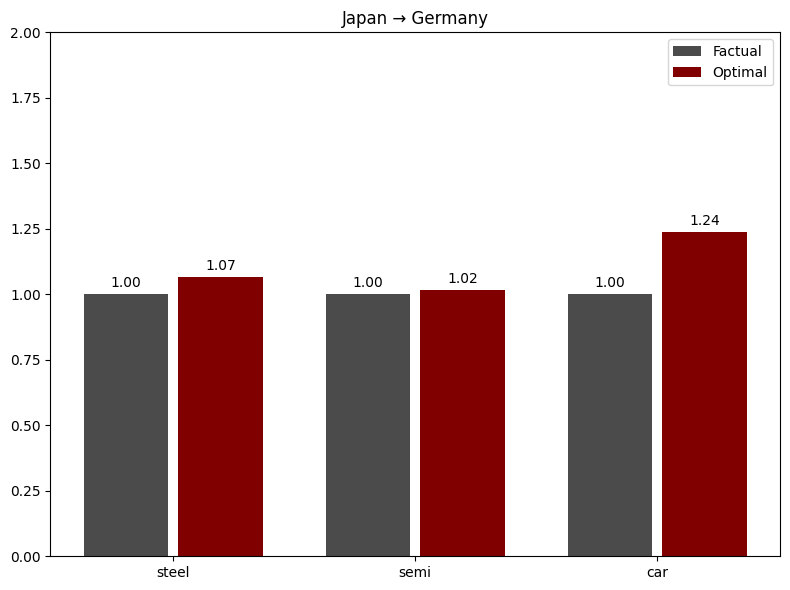

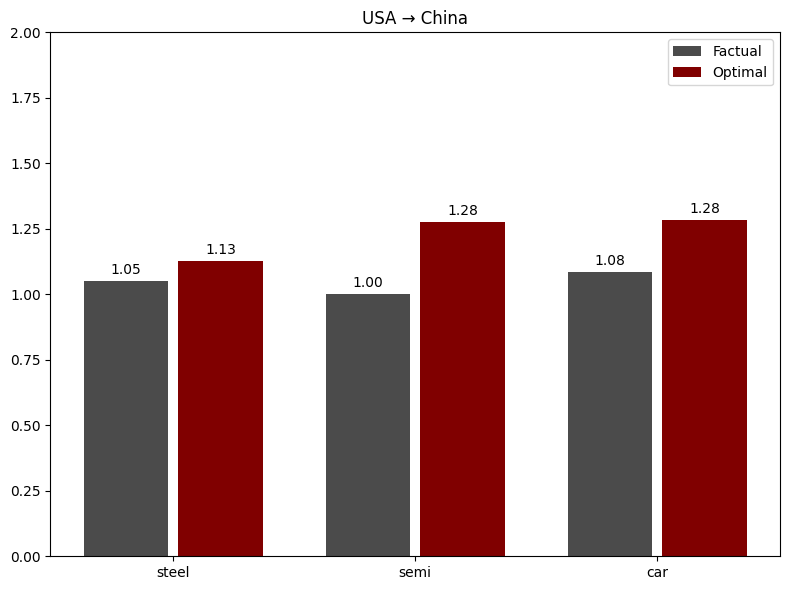

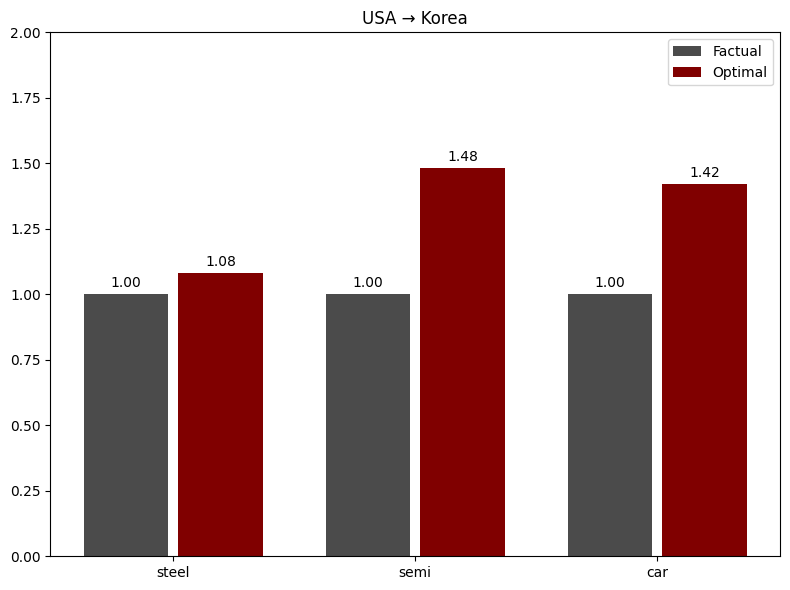

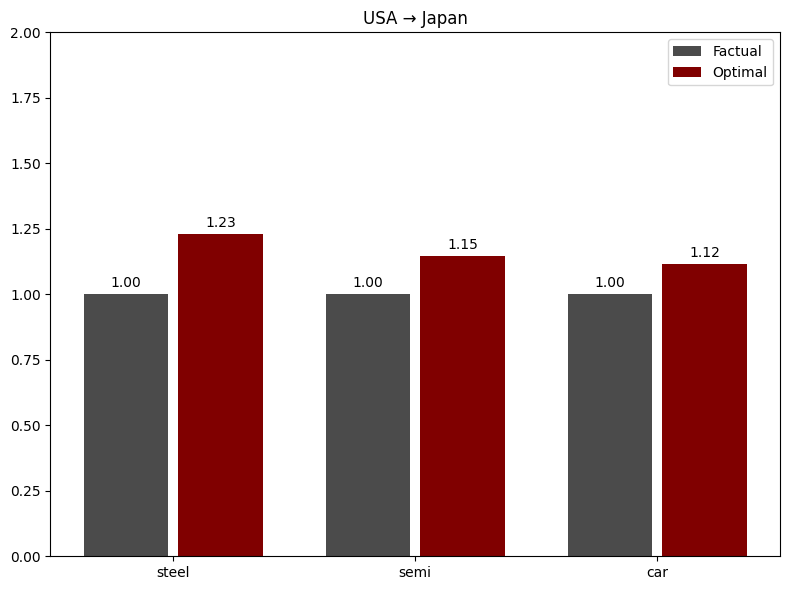

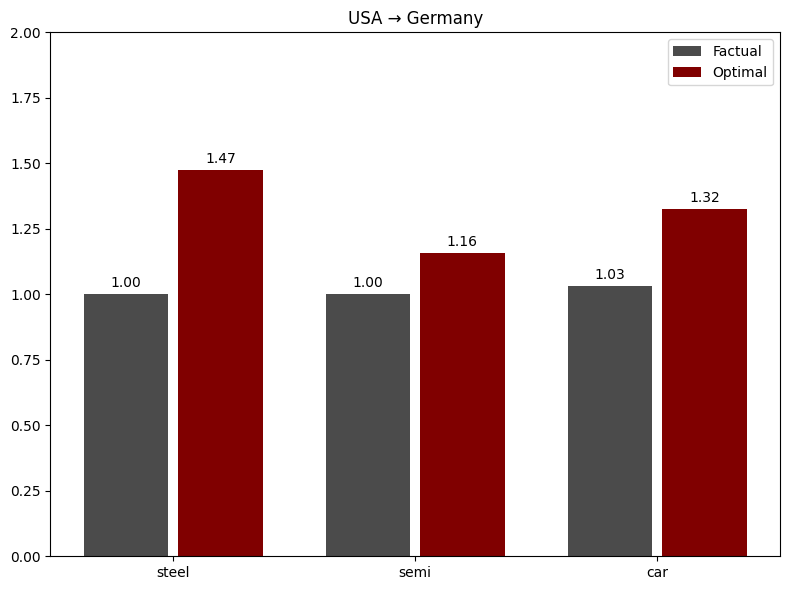

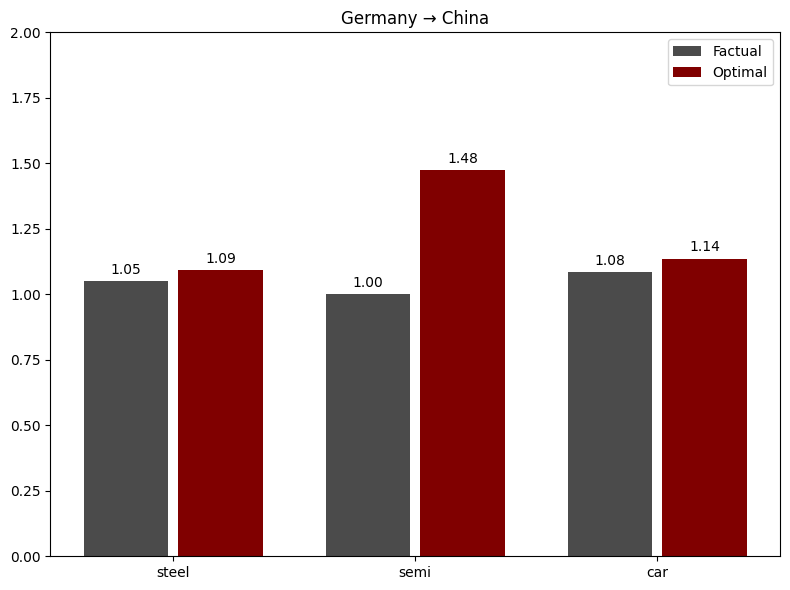

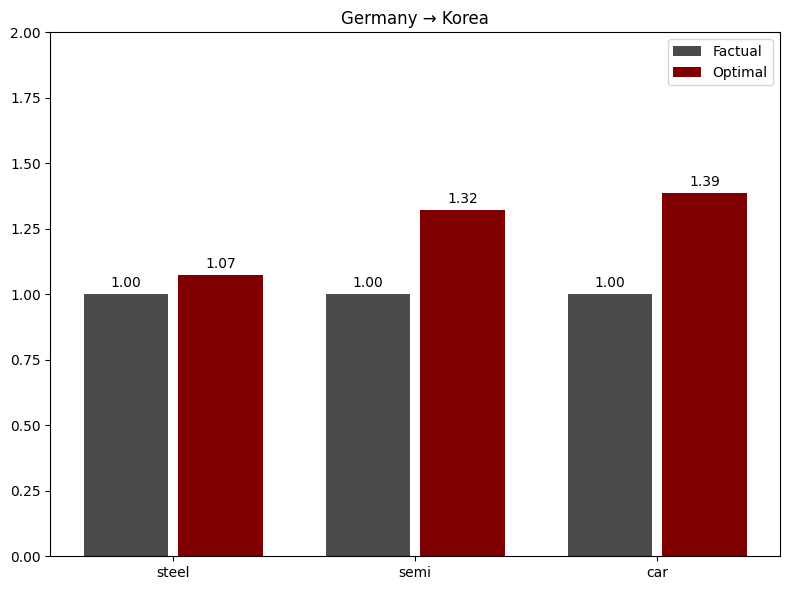

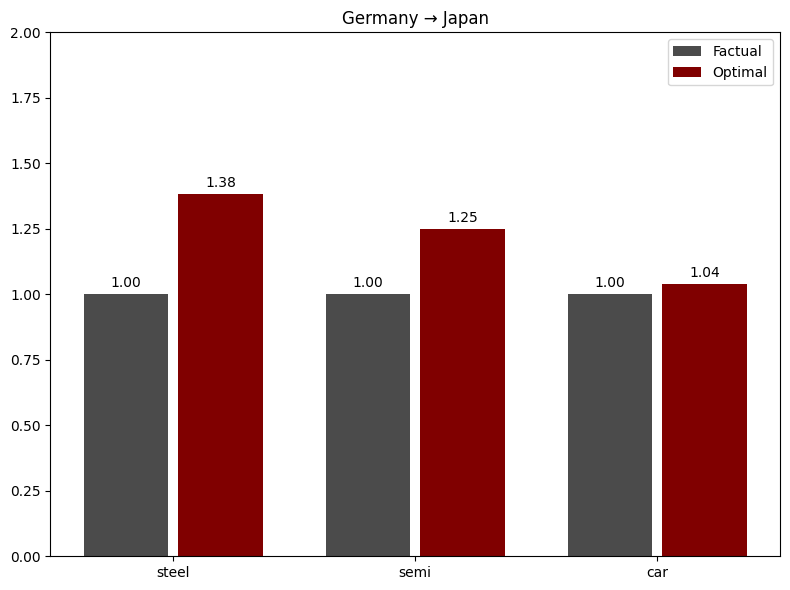

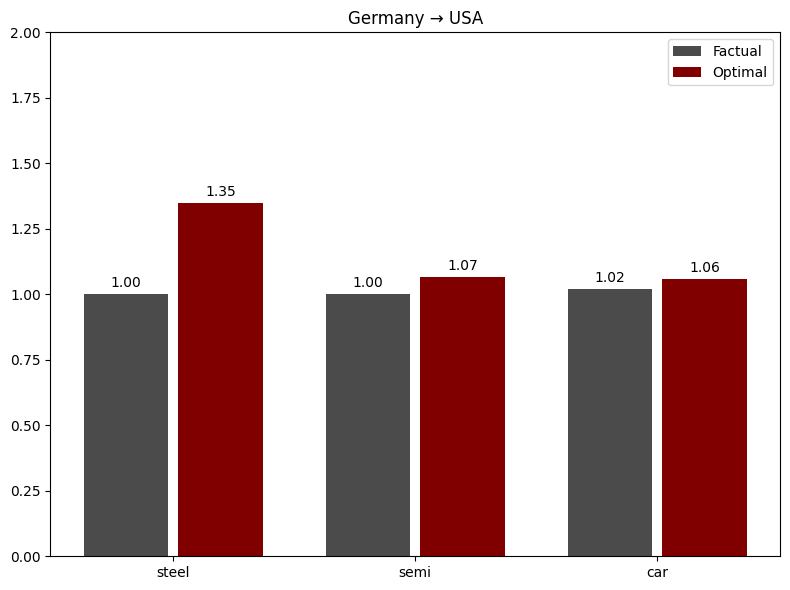

In [5]:
# Adjusting the plotting code to generate 12 separate graphs
for i, exporter in enumerate(countries):
    for j, importer in enumerate(countries):
        if exporter != importer:
            fig, ax = plt.subplots(figsize=(8, 6))
            ind = np.arange(len(industries))
            width = 0.35

            factual_values = factual_tariffs[exporter].loc[:, importer]
            optimal_values = optimal_tariffs[exporter].loc[:, importer]

            # factual 값을 막대로 표시
            rects1 = ax.bar(ind - width/2 - 0.02, factual_values, width, label='Factual', color = '#4B4B4B')
            # optimal 값을 막대로 표시
            rects2 = ax.bar(ind + width/2 + 0.02, optimal_values, width, label='Optimal', color='#800000')
        
            ax.bar_label(rects1, padding=3, fmt='%.2f')
            ax.bar_label(rects2, padding=3, fmt='%.2f')
            ax.set_ylim([0,2.0])

            ax.set_ylim(0, 2)
            ax.set_title(f'{exporter} → {importer}')
            ax.set_xticks(ind)
            ax.set_xticklabels(industries)
            ax.legend()

            plt.tight_layout()
            plt.show()
